<a href="https://colab.research.google.com/github/WidyaIn/PCVK_Semester5/blob/main/Week6_WIDYA_INDAH_PUSPITA_SARI_Modul6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : WIDYA INDAH PUSPITA SARI

KELAS : TI-3A

NIM : 2141720034

In [18]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [19]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

<BarContainer object of 256 artists>

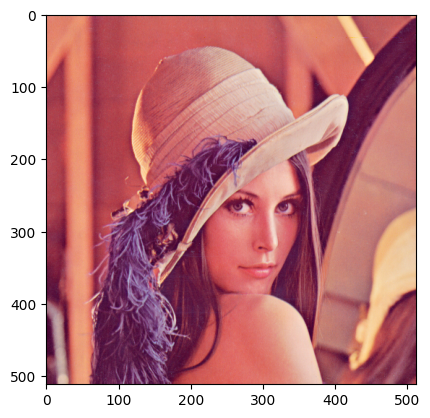

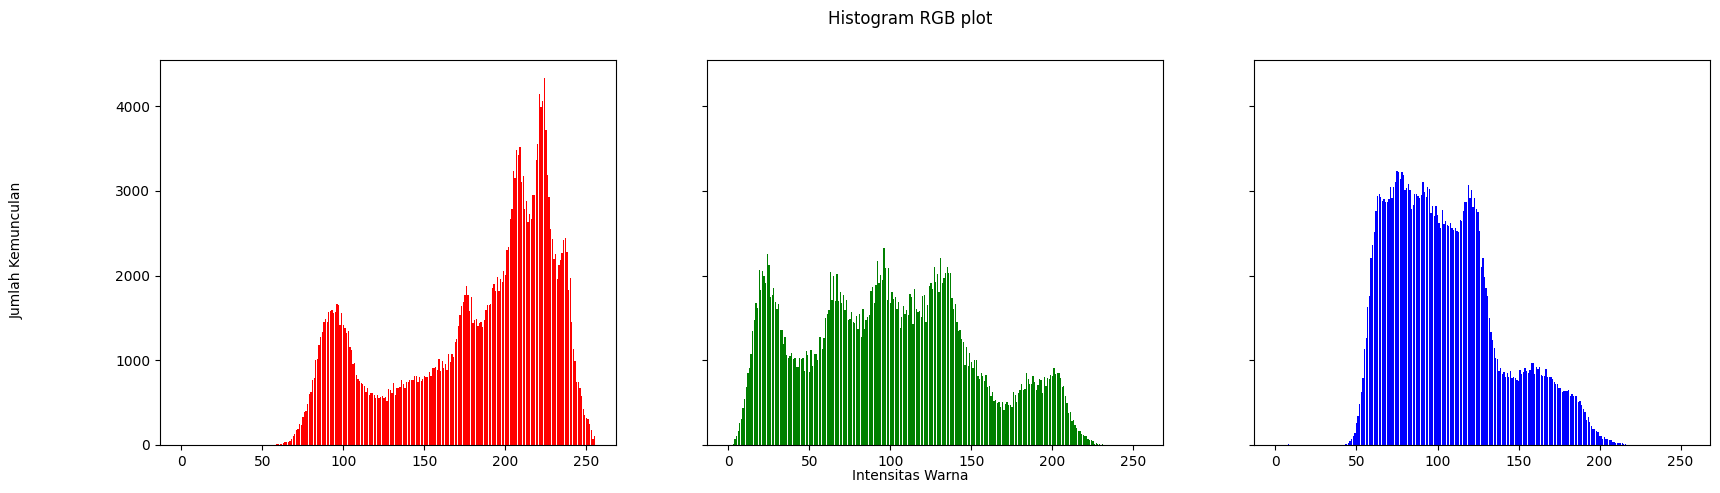

In [20]:
# 3. Membuat histogram citra seperti output histogram berdasarkan flowchart diatas

img_1 = cv.imread('/content/drive/MyDrive/Images/Lenna.png')
img_rgb = cv.cvtColor(img_1,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

height, width, depth = np.shape(img_1)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

#menghitung jumlah kemunculan setiap pixel
#menggunakan 2 loop
for y in range(0,height): # untuk kolom
  for x in range(0,width): # untuk baris
  #mengambil nilai intensitas warna merah, hijau, dan biru dari setiap pixel dan meningkatkan nilai yang sesuai dalam array red, green, dan blue.
    blue[img_1[y][x][0]] += 1
    green[img_1[y][x][1]] += 1
    red[img_1[y][x][2]] += 1

# Membuat histogram dengan sumbu x adalah intensitas warna dan sumbu y jumlah kemunculan
names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
##Pada bagian ini, tiga histogram (untuk kanal warna merah, hijau, dan biru) dibuat menggunakan axs[0], axs[1], dan axs[2].
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')


4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

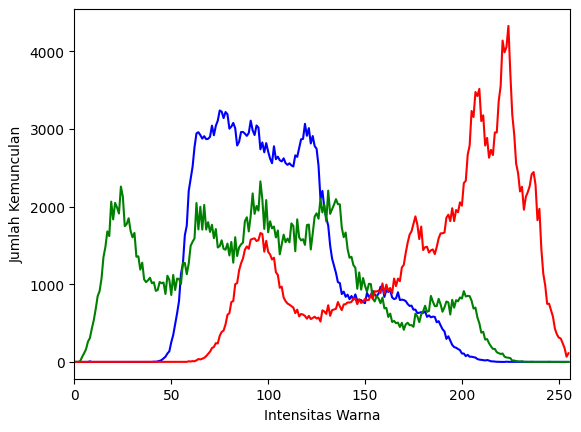

In [21]:
# 4. Membuat histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”.

colors = ("b", "g", "r")
channel_ids = (0,1,2)

# membuat histogram plot

plt.xlim([0,256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        img_1[:,:, channel_id], bins=256, range=(0,256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")

plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

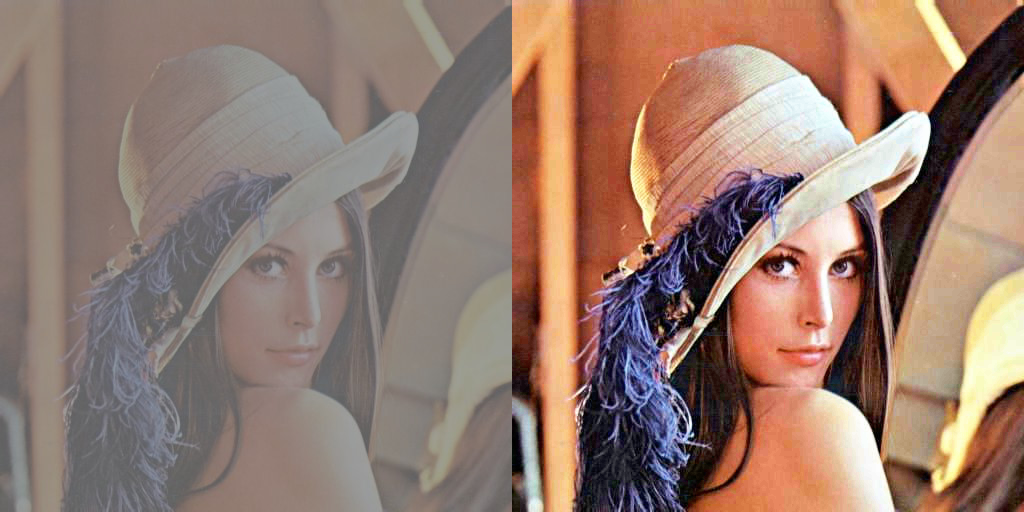

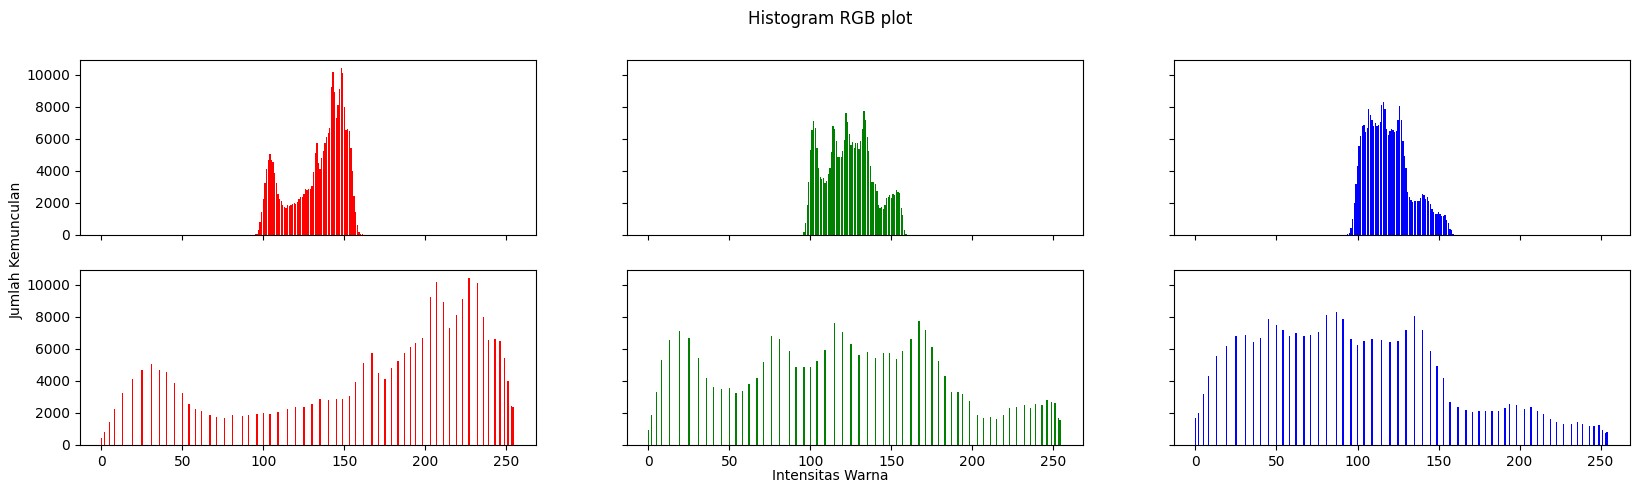

In [22]:
# 5. Membuat histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization

img1 = cv.imread('/content/drive/MyDrive/Images/lena_lc.jpg')
def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

histo_asli = histog(img1)

#convert to Numpy array
img_array = np.asarray(img1)

#Step 1: Normalized cumulative histogram
#menghitung jumlah kemunculan setiap pixel warna pada nilai tertentu (Frekuensi) dgn histogram array
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
#histogram_array yang telah mengalami penjumlahan akan dinormalisasi dengan cara membaginya
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
#Penjumlahan kumulatif dari frekuensi yang sudah diketahui, kemudian dibagi dengan jumlah pixel
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
#implementasi rumus K0 (skala warna) setelah pembagian dengan nilai piksel sebelumnya
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
#Menampilkan hasil Histogram Equalization
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array / transformasi kembali dalam bentuk citra
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

# tampilan citra hasil Histogram Equalization dan histogram sebelum dan sesudah proses Histogram Equalization
equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?


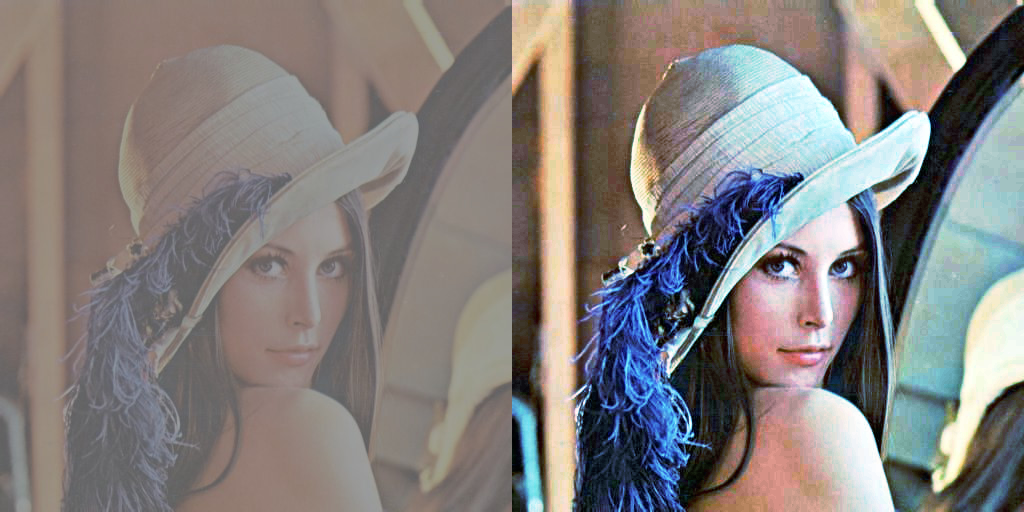

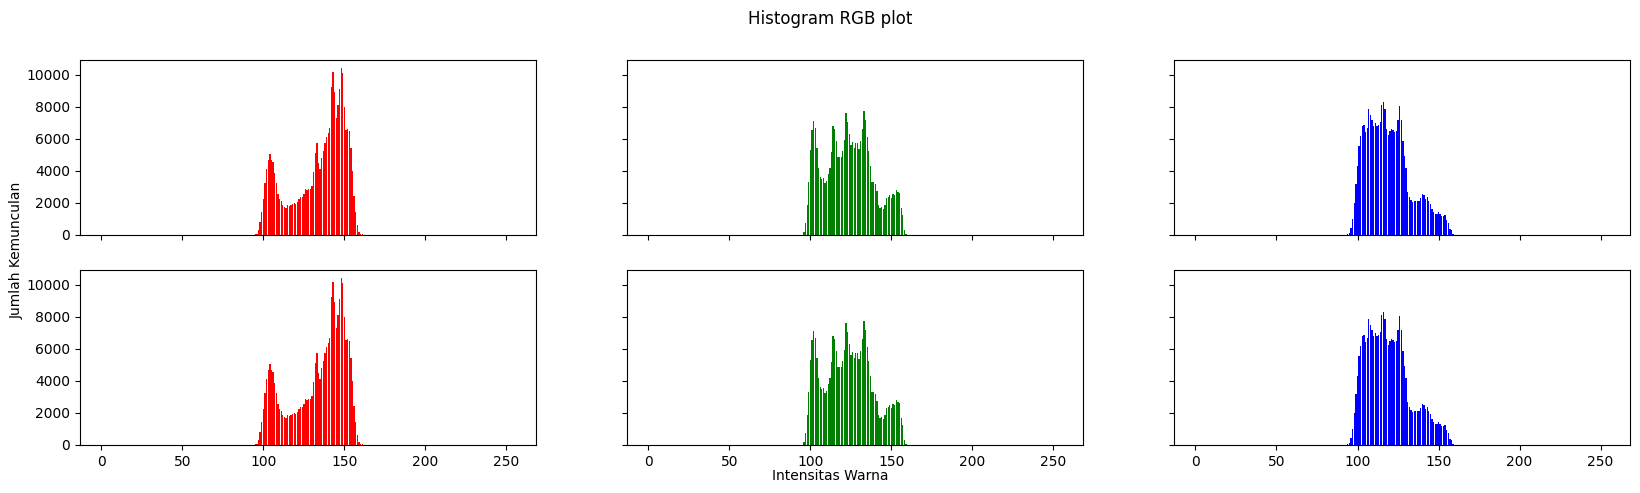

In [23]:
# 6. Membuat histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”.

channels = cv.split(img1)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img1, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

Penjelasan: Kode #5 dan Kode #6 melakukan Histogram Equalization dan menampilkan hasilnya menggunakan dua pendekatan yang berbeda.

**Kode #5** mengimplementasikan Histogram Equalization secara manual. Adanya proses normalisasi sehingga tampilan histogram berjarak.

**Kode #6**, menggunakan fungsi `cv.equalizeHist` yang disediakan oleh OpenCV dan dilakukan secara otomatis.  



7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

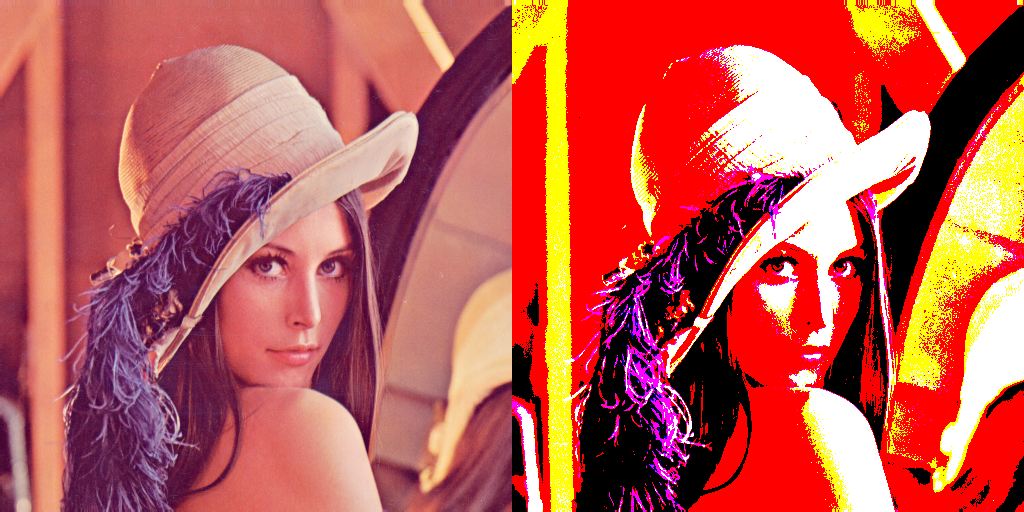

True

In [24]:
# 7. Proses pemetaan 16 juta warna RGB ke dalam 8 warna yaitu hitam, hijau, kuning, biru, cyan, magenta, putih

def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/Images/testlenna.png', img_8)


8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

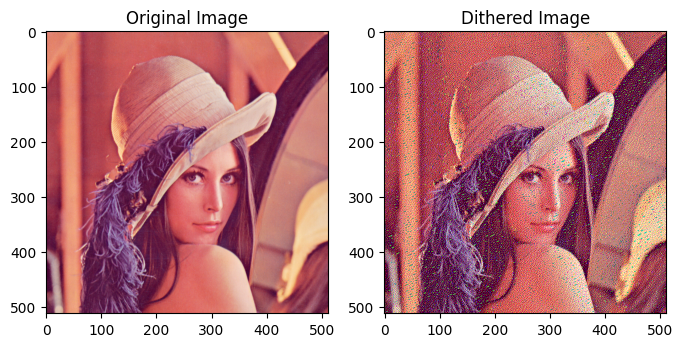

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/drive/MyDrive/Images/Lenna.png')

# Display the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Perform Floyd-Steinberg dithering on each color channel separately
def floyd_steinberg_dithering_channel(image_channel):
    height, width = image_channel.shape
    new_channel = np.copy(image_channel)
    for y in range(height):
        for x in range(width):
            old_pixel = new_channel[y, x]
            new_pixel = 255 if old_pixel > 128 else 0
            error = old_pixel - new_pixel
            new_channel[y, x] = new_pixel
            if x < width - 1:
                new_channel[y, x + 1] += error * 7 / 16
            if x > 0 and y < height - 1:
                new_channel[y + 1, x - 1] += error * 3 / 16
            if y < height - 1:
                new_channel[y + 1, x] += error * 5 / 16
            if x < width - 1 and y < height - 1:
                new_channel[y + 1, x + 1] += error * 1 / 16
    return new_channel

# Split the image into color channels
b, g, r = cv2.split(img)

# Apply dithering to each color channel
dithered_b = floyd_steinberg_dithering_channel(b)
dithered_g = floyd_steinberg_dithering_channel(g)
dithered_r = floyd_steinberg_dithering_channel(r)

# Merge the dithered color channels back into a single image
dithered_img = cv2.merge((dithered_b, dithered_g, dithered_r))

# Display the dithered image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dithered_img, cv2.COLOR_BGR2RGB))
plt.title('Dithered Image')

plt.show()

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

Gambar Perbandingan


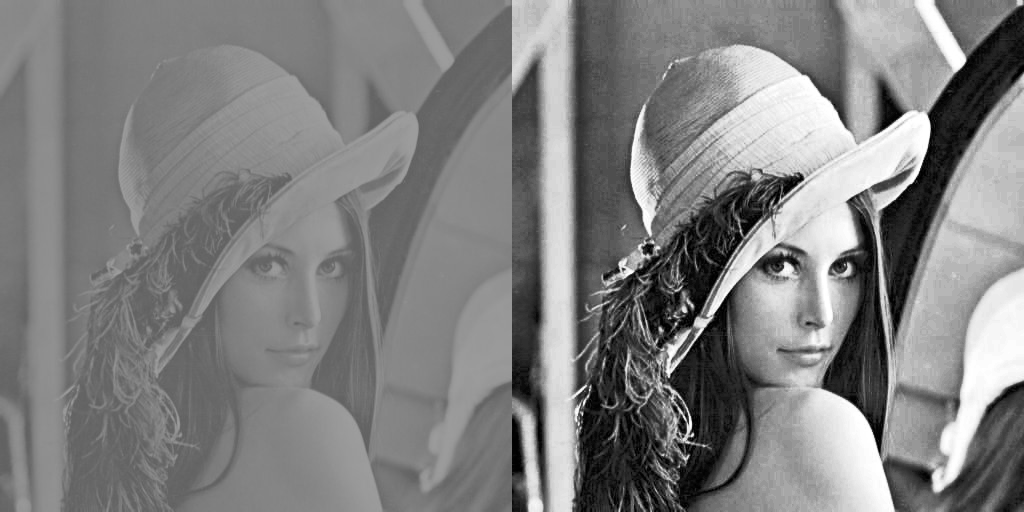

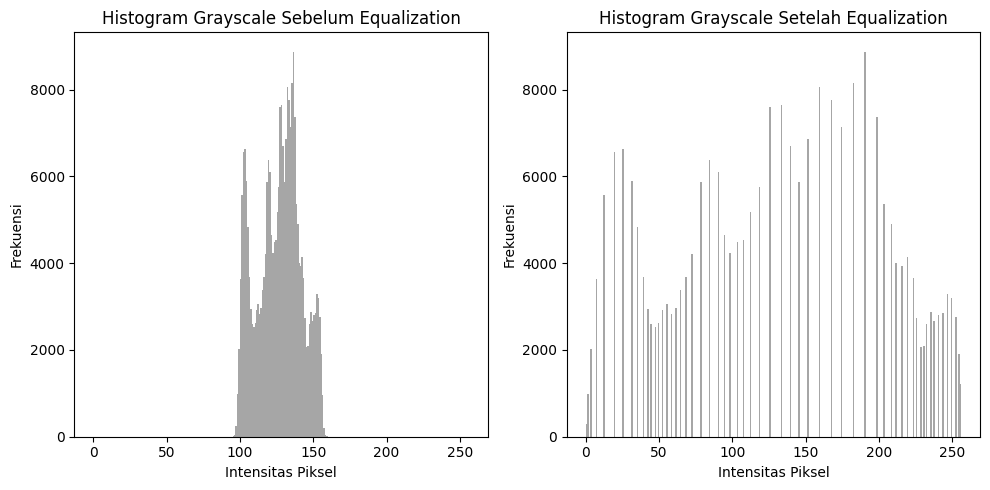

 
Gambar Dithering Floyd and Steinberg


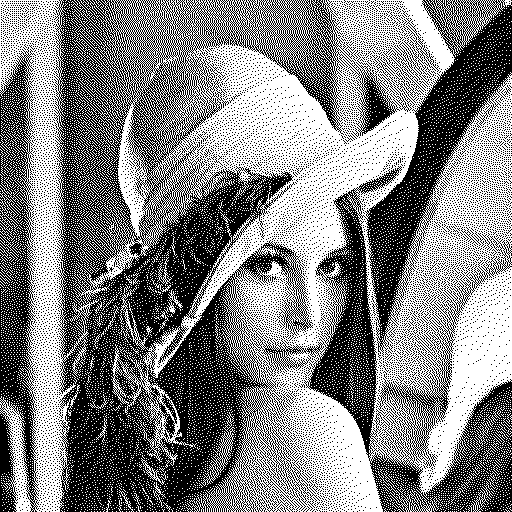

In [26]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar dan ubah ke citra grayscale
img = cv2.imread('/content/drive/MyDrive/Images/lena_lc.jpg', cv2.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_img = cv2.equalizeHist(img)

# Terapkan proses dithering Floyd and Steinberg
img_float = np.float32(equalized_img)
height, width = img.shape

for y in range(height):
    for x in range(width):
        old_value = img_float[y, x]
        new_value = round(old_value / 255) * 255
        img_float[y, x] = new_value

        error = old_value - new_value

        if x < width - 1:
            img_float[y, x + 1] += error * 7 / 16
        if y < height - 1:
            if x > 0:
                img_float[y + 1, x - 1] += error * 3 / 16
            img_float[y + 1, x] += error * 5 / 16
            if x < width - 1:
                img_float[y + 1, x + 1] += error * 1 / 16

output_img = np.uint8(img_float)

# Menggabungkan gambar asli dan gambar setelah histogram equalization
final_frame = cv2.hconcat((img, equalized_img))

# Menampilkan hasil gabungan
print('Gambar Perbandingan')
cv2_imshow(final_frame)

# Plot histogram dari citra grayscale
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(img.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Histogram Grayscale Sebelum Equalization')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

# Plot histogram dari citra setelah equalization
plt.subplot(122)
plt.hist(equalized_img.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Histogram Grayscale Setelah Equalization')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

print(' ')

# Jika Anda memiliki gambar output lainnya
print('Gambar Dithering Floyd and Steinberg')
cv2_imshow(output_img)
plt.show()